<a href="https://colab.research.google.com/github/Crispis723/-challenge1-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [14]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
# Calcular los ingresos totales para cada tienda
ingreso_total_tienda = tienda['Precio'].sum() #.sum suma todos los valeres de nua columna
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

In [8]:
# Mostrar los resultados
print(f"Ingreso total de la Tienda 1: ${ingreso_total_tienda}")
print(f"Ingreso total de la Tienda 2: ${ingreso_total_tienda2}")
print(f"Ingreso total de la Tienda 3: ${ingreso_total_tienda3}")
print(f"Ingreso total de la Tienda 4: ${ingreso_total_tienda4}")


Ingreso total de la Tienda 1: $1150880400.0
Ingreso total de la Tienda 2: $1116343500.0
Ingreso total de la Tienda 3: $1098019600.0
Ingreso total de la Tienda 4: $1038375700.0


# 2. Ventas por categoría

In [9]:
def calcular_ventas_por_categoria(dataframe, nombre_tienda):
    ventas_por_categoria = dataframe.groupby('Categoría del Producto')['Producto'].count()
    print(f"Total de productos vendidos por categoría en {nombre_tienda}:")
    print(ventas_por_categoria)
    print("\n")  # Salto de línea para separar las salidas


In [10]:
# Calcular y mostrar las ventas por categoría para cada tienda
calcular_ventas_por_categoria(tienda, "Tienda 1")
calcular_ventas_por_categoria(tienda2, "Tienda 2")
calcular_ventas_por_categoria(tienda3, "Tienda 3")
calcular_ventas_por_categoria(tienda4, "Tienda 4")

Total de productos vendidos por categoría en Tienda 1:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Producto, dtype: int64


Total de productos vendidos por categoría en Tienda 2:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
Name: Producto, dtype: int64


Total de productos vendidos por categoría en Tienda 3:
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                

# 3. Calificación promedio de la tienda


In [12]:
def calcular_calificacion_promedio(dataframe, nombre_tienda):
    promedio = dataframe['Calificación'].mean()  # Calcula la media de la columna 'Calificación'
    print(f"La calificación promedio de los clientes para {nombre_tienda} es: {promedio:.2f}")



In [13]:
# Calcular y mostrar las ventas por categoría para cada tienda
calcular_calificacion_promedio(tienda, "Tienda 1")
calcular_calificacion_promedio(tienda2, "Tienda 2")
calcular_calificacion_promedio(tienda3, "Tienda 3")
calcular_calificacion_promedio(tienda4, "Tienda 4")

La calificación promedio de los clientes para Tienda 1 es: 3.98
La calificación promedio de los clientes para Tienda 2 es: 4.04
La calificación promedio de los clientes para Tienda 3 es: 4.05
La calificación promedio de los clientes para Tienda 4 es: 4.00


# 4. Productos más y menos vendidos

In [19]:
def analizar_y_graficar_productos(dataframe, nombre_tienda):
    ventas_por_producto = dataframe.groupby('Producto')['Producto'].count()  # Conteo de ventas por producto

    # Ordenar los productos por ventas
    ventas_ordenadas = ventas_por_producto.sort_values(ascending=False)

    # Visualización: Graficar los productos más vendidos y menos vendidos
    plt.figure(figsize=(10, 6))
    ventas_ordenadas.plot(kind='bar', color='skyblue')
    plt.title(f"Productos vendidos en {nombre_tienda}", fontsize=14) # se asigna titulo
    plt.xlabel("Producto", fontsize=8) #se usa en x los productos
    plt.ylabel("Cantidad de ventas", fontsize=12) # en la  y se usa la cantidad de ventas
    plt.xticks(rotation=45, fontsize=10) # modificala legibilidad del eje x fontsize es la fuente
    plt.tight_layout() # tamaño del grafico
    plt.show() #muestra el grafico

    # Identificar y mostrar los más y menos vendidos
    producto_mas_vendido = ventas_ordenadas.idxmax()#idxmax encuentra el indice con mayor valor
    cantidad_mas_vendida = ventas_ordenadas.max()#max el valor maximo
    producto_menos_vendido = ventas_ordenadas.idxmin()  #idxmin encuentra el indice con menior valor
    cantidad_menos_vendida = ventas_ordenadas.min()#min el valor minimo

    print(f"En {nombre_tienda}:")
    print(f"Producto más vendido: {producto_mas_vendido} con {cantidad_mas_vendida} ventas.")
    print(f"Producto menos vendido: {producto_menos_vendido} con {cantidad_menos_vendida} ventas.\n")



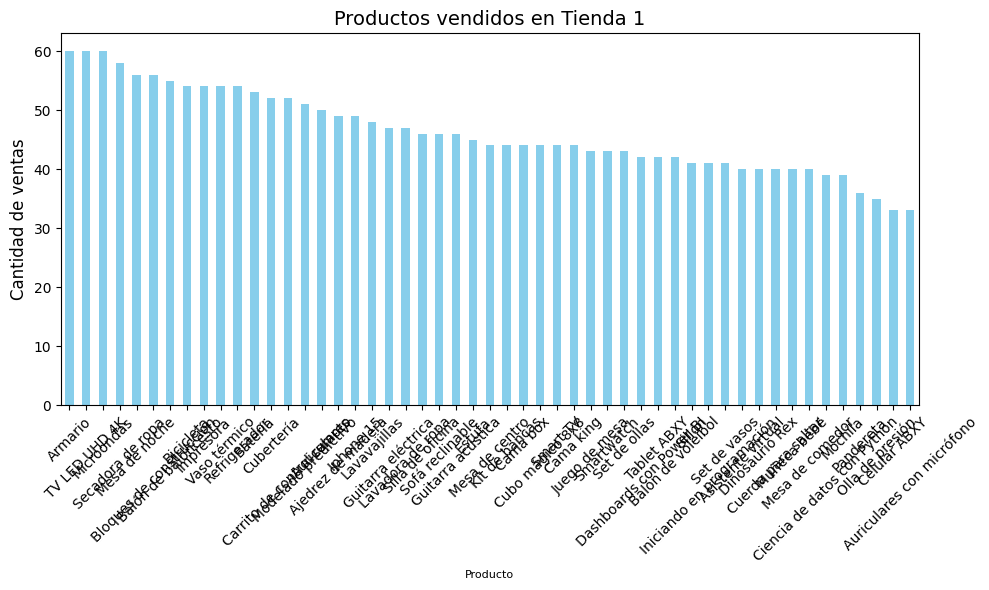

En Tienda 1:
Producto más vendido: Armario con 60 ventas.
Producto menos vendido: Celular ABXY con 33 ventas.



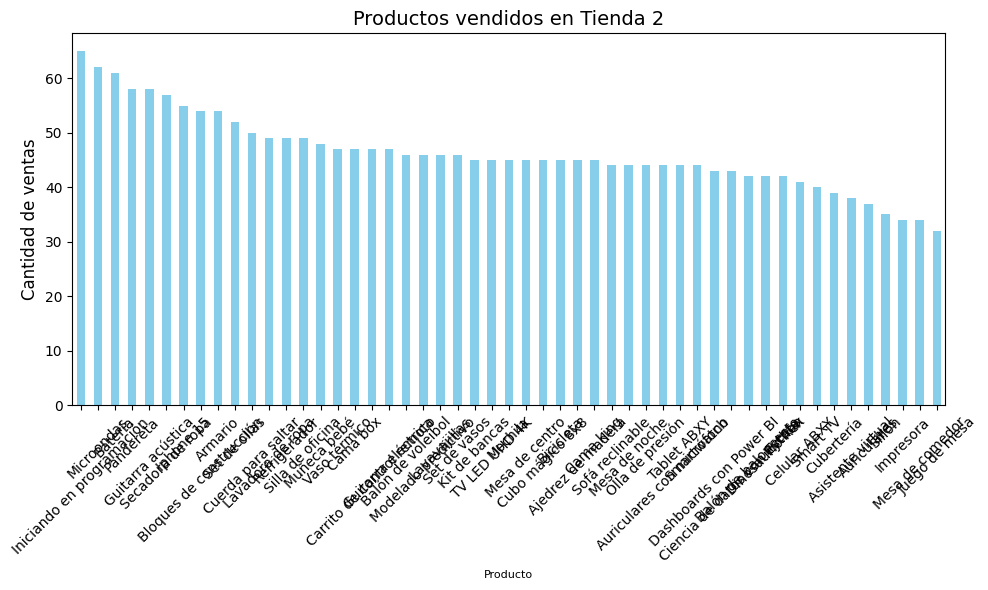

En Tienda 2:
Producto más vendido: Iniciando en programación con 65 ventas.
Producto menos vendido: Juego de mesa con 32 ventas.



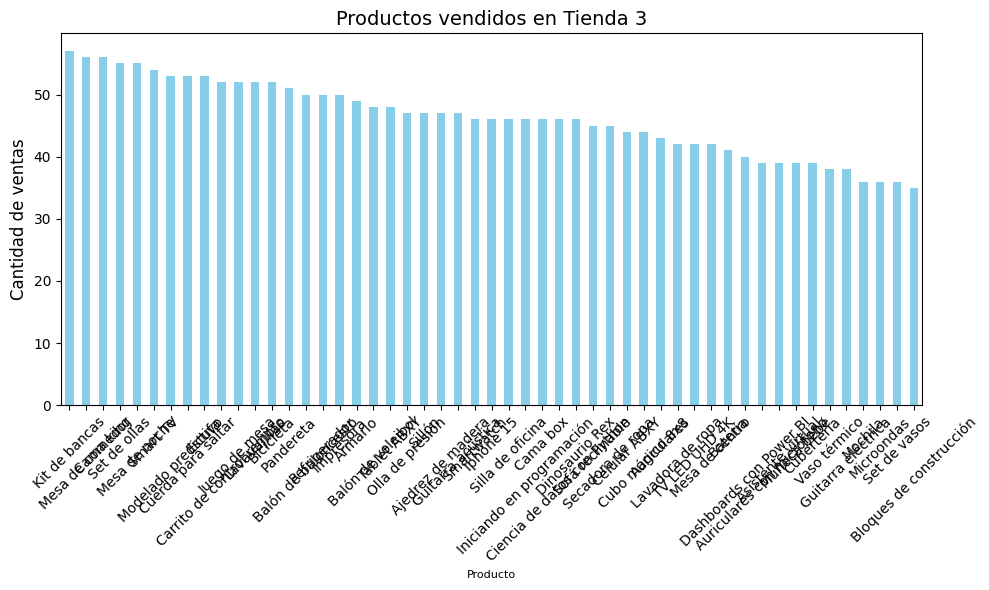

En Tienda 3:
Producto más vendido: Kit de bancas con 57 ventas.
Producto menos vendido: Bloques de construcción con 35 ventas.



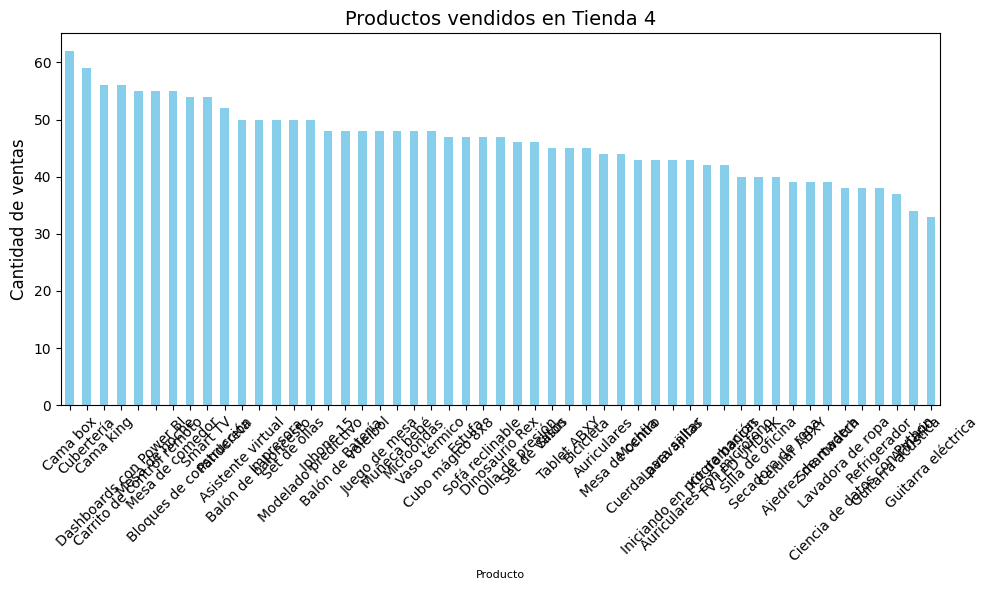

En Tienda 4:
Producto más vendido: Cama box con 62 ventas.
Producto menos vendido: Guitarra eléctrica con 33 ventas.



In [20]:
# Usar la función para cada tienda
analizar_y_graficar_productos(tienda, "Tienda 1")
analizar_y_graficar_productos(tienda2, "Tienda 2")
analizar_y_graficar_productos(tienda3, "Tienda 3")
analizar_y_graficar_productos(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [27]:
def calcular_promedio_envio(dataframe, nombre_tienda):
    promedio = dataframe['Costo de envío'].mean()#promdedio
    print(f"el costo promedio de envio de {nombre_tienda} es: {promedio:.2f}")

In [28]:
# Usar la función para cada tienda
calcular_promedio_envio(tienda, "Tienda 1")
calcular_promedio_envio(tienda2, "Tienda 2")
calcular_promedio_envio(tienda3, "Tienda 3")
calcular_promedio_envio(tienda4, "Tienda 4")

el costo promedio de envio de Tienda 1 es: 26018.61
el costo promedio de envio de Tienda 2 es: 25216.24
el costo promedio de envio de Tienda 3 es: 24805.68
el costo promedio de envio de Tienda 4 es: 23459.46


# Graficos

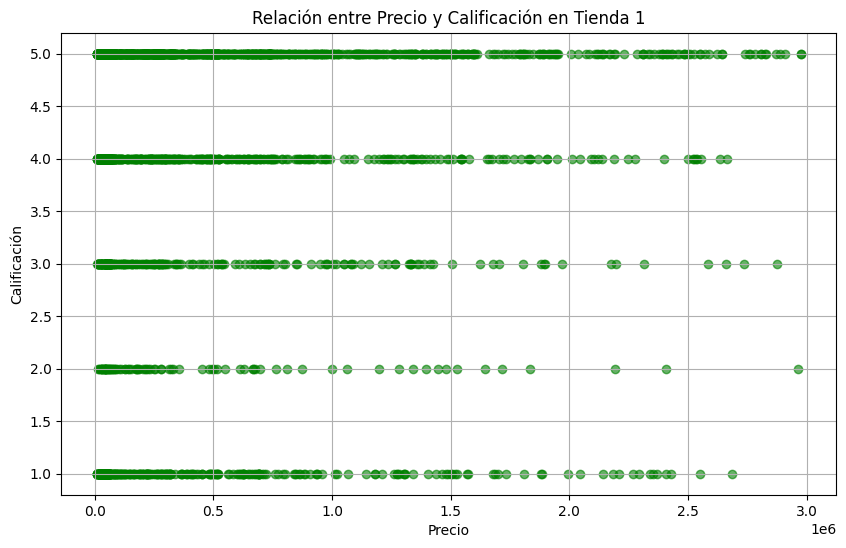

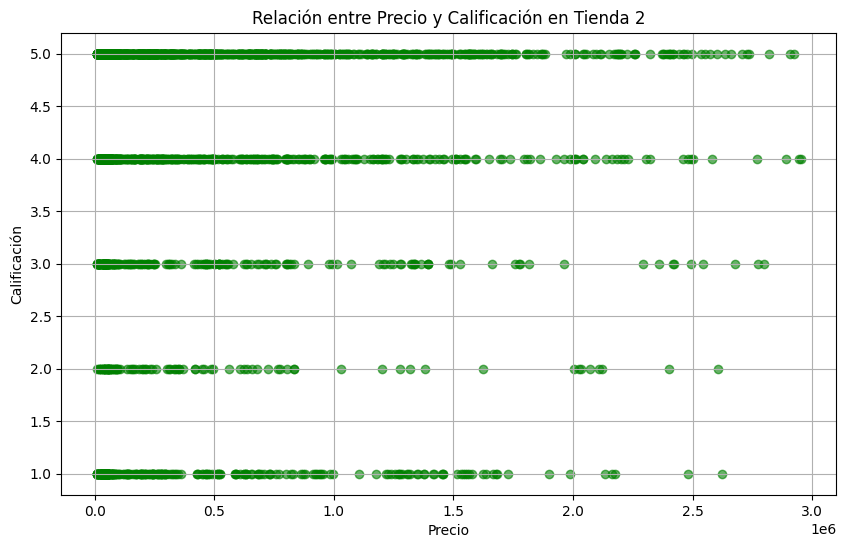

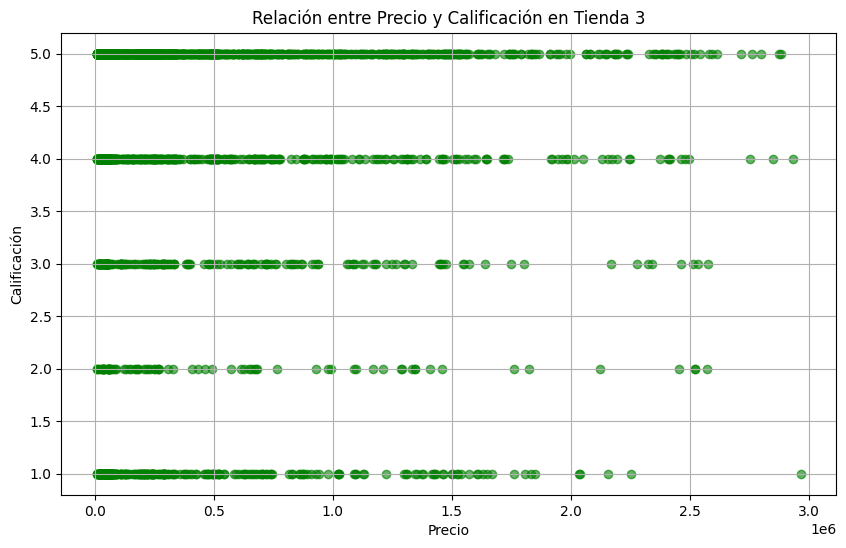

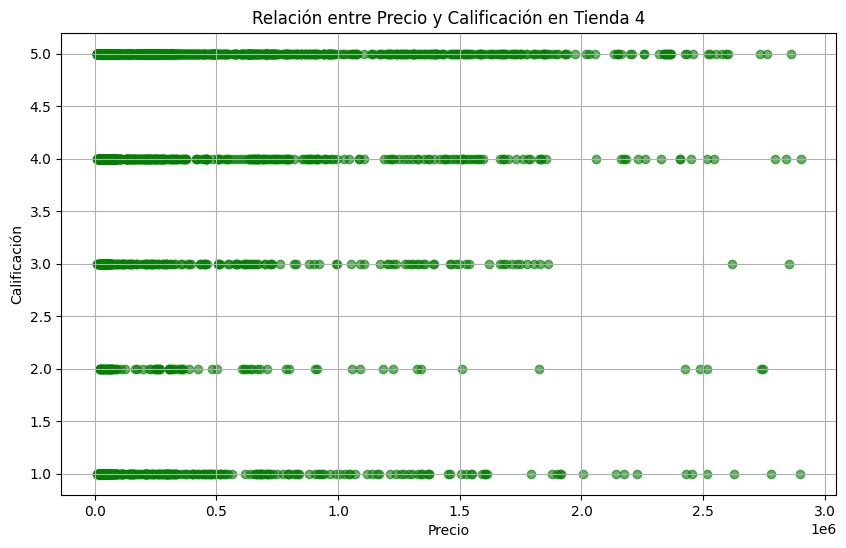

In [29]:
def analizar_y_graficar_calificacion(dataframe, nombre_tienda):
  plt.figure(figsize=(10, 6))
  plt.scatter(dataframe['Precio'], dataframe['Calificación'], alpha=0.6, color='green')
  plt.title(f"Relación entre Precio y Calificación en {nombre_tienda}")
  plt.xlabel("Precio")
  plt.ylabel("Calificación")
  plt.grid(True)
  plt.show()

analizar_y_graficar_calificacion(tienda, "Tienda 1")
analizar_y_graficar_calificacion(tienda2, "Tienda 2")
analizar_y_graficar_calificacion(tienda3, "Tienda 3")
analizar_y_graficar_calificacion(tienda4, "Tienda 4")

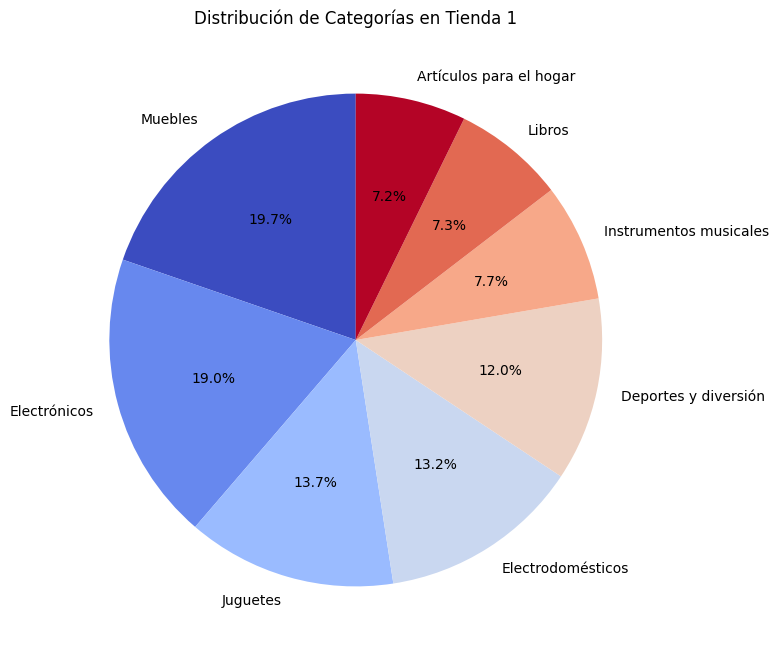

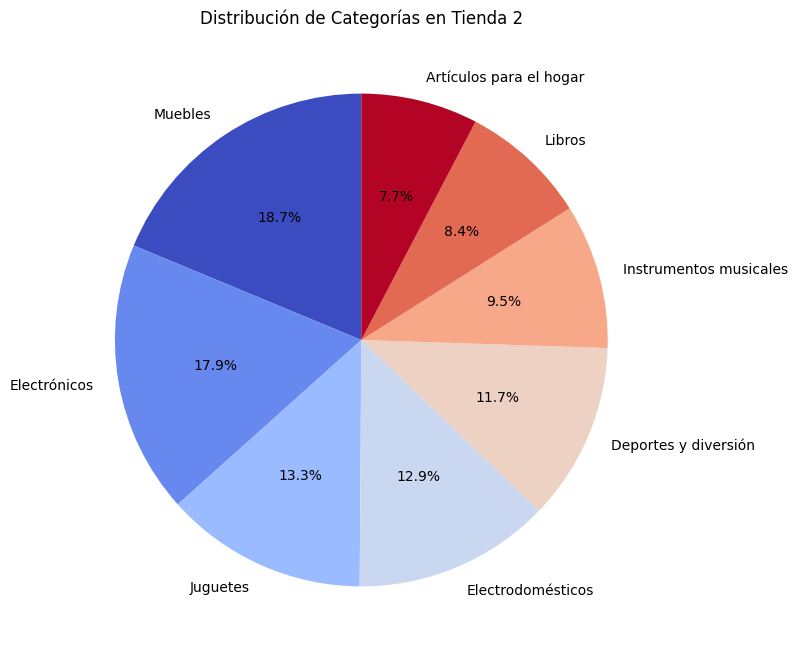

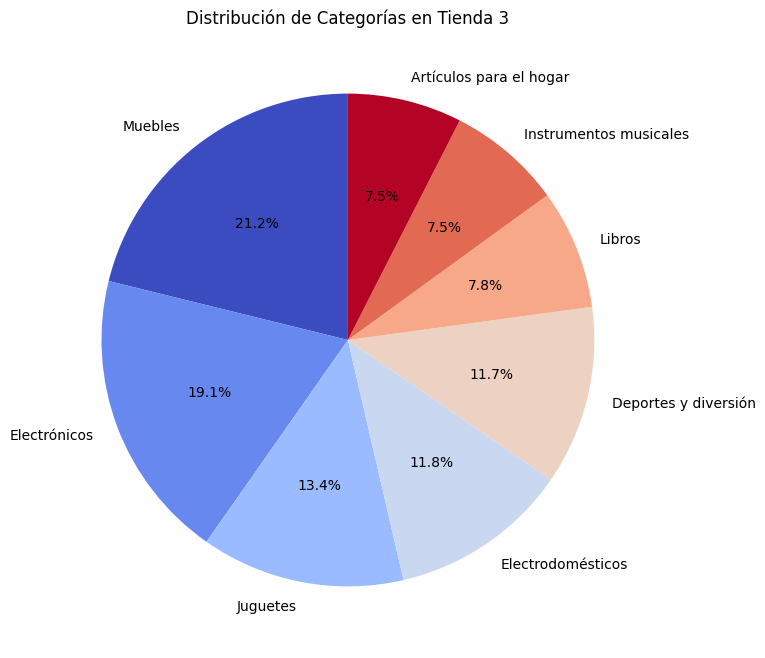

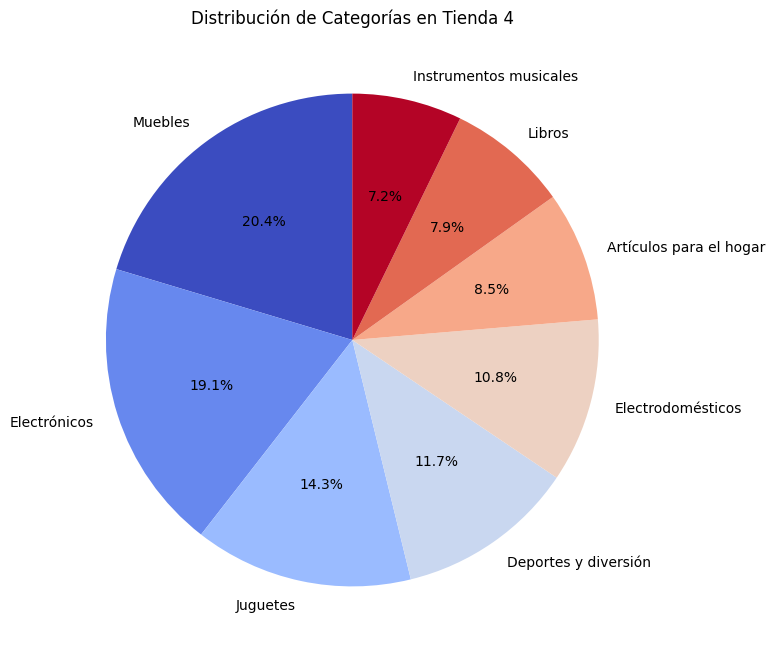

In [31]:
def analizar_y_graficar_categorias(dataframe, nombre_tienda):
  distribucion_categorias = dataframe['Categoría del Producto'].value_counts()

  # Crear el gráfico de pastel
  plt.figure(figsize=(8, 8))
  distribucion_categorias.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
  plt.title(f"Distribución de Categorías en {nombre_tienda}")
  plt.ylabel("")  # Oculta el label del eje Y
  plt.show()

analizar_y_graficar_categorias(tienda, "Tienda 1")
analizar_y_graficar_categorias(tienda2, "Tienda 2")
analizar_y_graficar_categorias(tienda3, "Tienda 3")
analizar_y_graficar_categorias(tienda4, "Tienda 4")